In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [10]:
with open("datasets/avoplotto.pkl","rb") as f:
    avocados = pickle.load(f)

In [11]:
# Look at the first few rows of data
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [18]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()
nb_sold_by_size

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

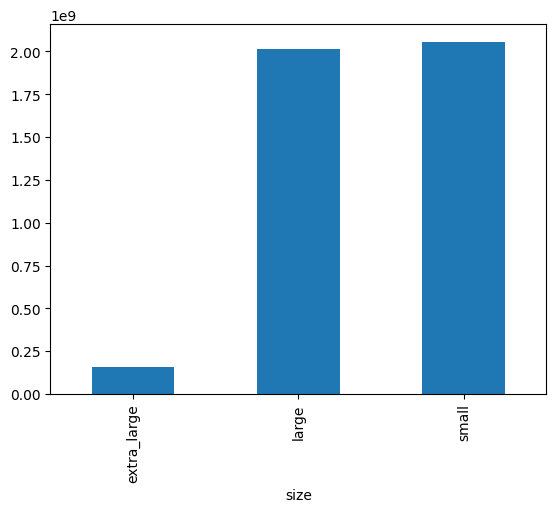

In [19]:
# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")
plt.show()

In [22]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()
nb_sold_by_date

date
2015-01-04    27279606.03
2015-01-11    25081927.33
2015-01-18    24961540.48
2015-01-25    24094678.66
2015-02-01    39838734.08
                 ...     
2018-02-25    25434002.74
2018-03-04    26834303.05
2018-03-11    26094044.41
2018-03-18    26030618.97
2018-03-25    27480242.92
Name: nb_sold, Length: 169, dtype: float64

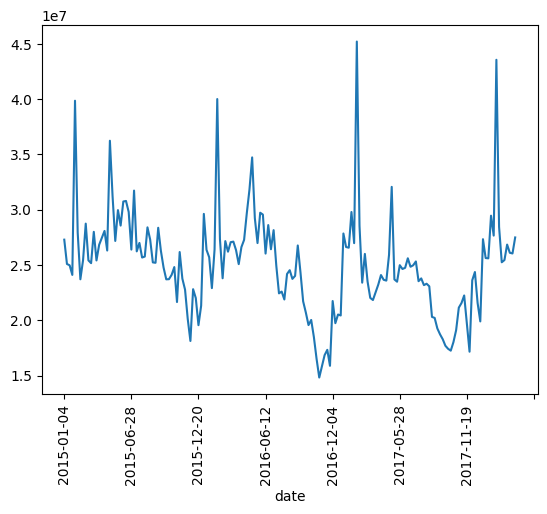

In [26]:
# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(rot=90)
plt.show()

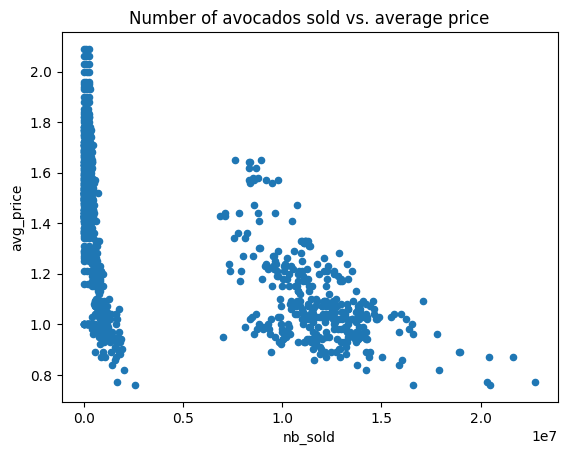

In [29]:
# Create a scatter plot with nb_sold on the x-axis and avg_price on the y-axis. 
# Title it "Number of avocados sold vs. average price".

avocados.plot(kind="scatter", x = "nb_sold", y = "avg_price", title = "Number of avocados sold vs. average price")
plt.show()

It looks like when more avocados are sold, prices go down. However, this doesn't mean that fewer sales causes higher prices - we can olny tell that they're correlated with each other

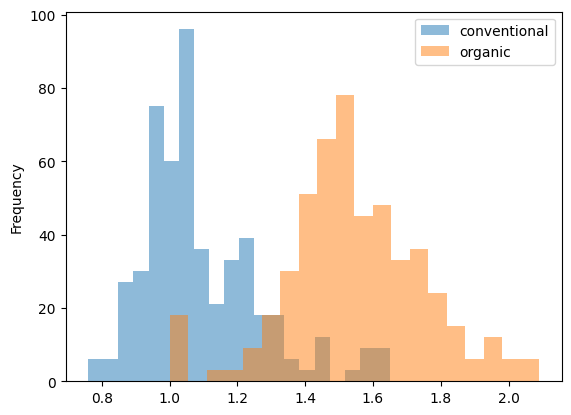

In [46]:
# Subset avocados for the conventional type, and the average price column. Create a histogram.
# Create a histogram of avg_price for organic type avocados.
# Add a legend to your plot, with the names "conventional" and "organic".
# Adjust the transparency of both histograms to 0.5 to see how much overlap there is between the two distributions.
# Use 20 bins in both histograms.

avocados[avocados["type"] == "conventional"]["avg_price"].plot(kind="hist", alpha = 0.5, bins=20)
avocados[avocados["type"] == "organic"]["avg_price"].plot(kind="hist", alpha = 0.5, bins=20)
plt.legend(["conventional", "organic"])
plt.show()

We can see that on average, organic avocados are more expensive than conventional ones, but their price distributions have some overlap.

### Finding Missing Values
In pandas DataFrame, missing values are indicated with NaN, which stands for "not a number".

In [59]:
avocados["date"] = pd.to_datetime(avocados["date"])
avocados_2016 = avocados[avocados["date"].dt.year == 2016]

In [62]:
# Print a DataFrame that shows whether each value in avocados_2016 is missing or not.
avocados_2016.isna()

,date,type,year,avg_price,size,nb_sold
52,False,False,False,False,False,False
53,False,False,False,False,False,False
54,False,False,False,False,False,False
55,False,False,False,False,False,False
56,False,False,False,False,False,False
...,...,...,...,...,...,...
944,False,False,False,False,False,False
945,False,False,False,False,False,False
946,False,False,False,False,False,False
947,False,False,False,False,False,False


In [63]:
# Print a summary that shows whether any value in each column is missing or not.
avocados_2016.isna().any()

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool

<AxesSubplot:>

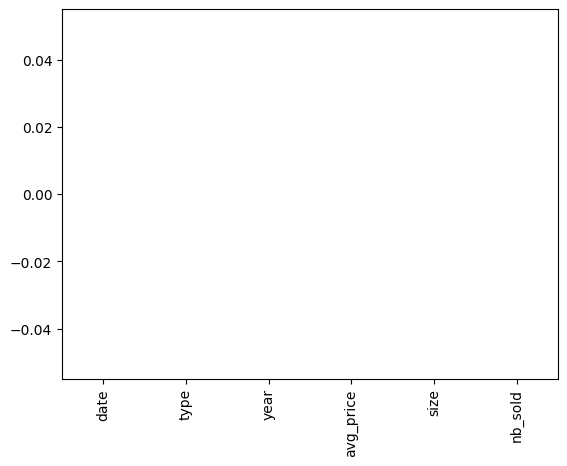

In [67]:
# Create a bar plot of the total number of missing values in each column.
avocados_2016.isna().sum().plot(kind="bar")

In [68]:
avocados_2016

,date,type,year,avg_price,size,nb_sold
52,2016-12-25,conventional,2016,1.00,small,9255125.20
53,2016-12-18,conventional,2016,0.96,small,9394065.91
54,2016-12-11,conventional,2016,0.98,small,9009996.11
55,2016-12-04,conventional,2016,1.00,small,11043350.90
56,2016-11-27,conventional,2016,1.21,small,7891487.94
...,...,...,...,...,...,...
944,2016-01-31,organic,2016,1.43,extra_large,5515.91
945,2016-01-24,organic,2016,1.41,extra_large,12933.97
946,2016-01-17,organic,2016,1.44,extra_large,13106.29
947,2016-01-10,organic,2016,1.35,extra_large,8771.79


### Removing Missing Values

In [73]:
# Remove the rows of avocados_2016 that contain missing values and store the remaining rows in avocados_complete.
avocados_complete = avocados_2016.dropna(how="any")
avocados_complete

,date,type,year,avg_price,size,nb_sold
52,2016-12-25,conventional,2016,1.00,small,9255125.20
53,2016-12-18,conventional,2016,0.96,small,9394065.91
54,2016-12-11,conventional,2016,0.98,small,9009996.11
55,2016-12-04,conventional,2016,1.00,small,11043350.90
56,2016-11-27,conventional,2016,1.21,small,7891487.94
...,...,...,...,...,...,...
944,2016-01-31,organic,2016,1.43,extra_large,5515.91
945,2016-01-24,organic,2016,1.41,extra_large,12933.97
946,2016-01-17,organic,2016,1.44,extra_large,13106.29
947,2016-01-10,organic,2016,1.35,extra_large,8771.79


In [74]:
# Check if any columns contain missing values
avocados_complete.isna().any()

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool

Removing observations with missing values is a quick and dirty way to deal with missing data, but this can introduce bias to your data if the values are not `missing at random`.

### Replacing Missing Values

In [93]:
avocados_2016.loc[avocados_2016["size"] == "small", "size"] = np.nan
avocados_2016.loc[avocados_2016["avg_price"] == 1, "avg_price"] = np.nan
avocados_2016.loc[avocados_2016["type"] == "organic", "type"] = np.nan

C:\Users\Fırat Olçum\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [98]:
avocados_2016.isna().any()

date         False
type          True
year         False
avg_price     True
size          True
nb_sold      False
dtype: bool

array([[<AxesSubplot:title={'center':'avg_price'}>]], dtype=object)

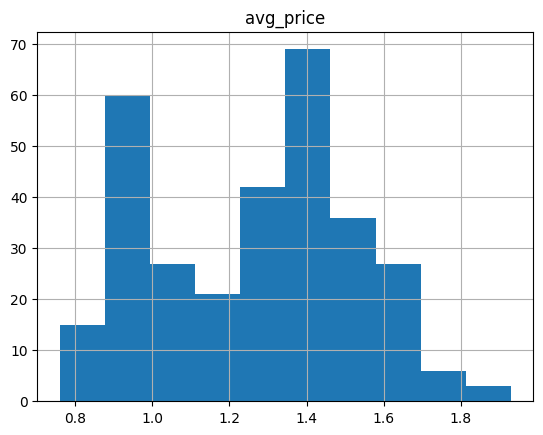

In [103]:
avocados_2016[["type", "avg_price", "size"]].hist()

In [106]:
# Fill in missing values with 0 for "avg_price"
avocados_2016["avg_price"].fillna(0)

52     0.00
53     0.96
54     0.98
55     0.00
56     1.21
       ... 
944    1.43
945    1.41
946    1.44
947    1.35
948    1.43
Name: avg_price, Length: 312, dtype: float64

### Creating DataFrames
- From a list of dictionaries
- From a dictionary of lists

In [107]:
my_dict = {
    "title" : "Charlotte's Web",
    "author" : "E.B. White",
    "published" : 1952
}

In [108]:
my_dict

{'title': "Charlotte's Web", 'author': 'E.B. White', 'published': 1952}

In [109]:
my_dict["title"]

"Charlotte's Web"

#### 1. From a list of dictionaries 

In [110]:
list_of_dicts = [
    {"name" : "Ginger", "breed" : "Dachsund", "height_cm" : 22, "weight_kg" : 10, "date_of_birth" : "2019-03-14"},
    {"name" : "Scout", "breed" : "Dalmatian", "height_cm" : 59, "weight_kg" : 25, "date_of_birth" : "2019-05-09"}
]

In [115]:
list_of_dicts

[{'name': 'Ginger',
  'breed': 'Dachsund',
  'height_cm': 22,
  'weight_kg': 10,
  'date_of_birth': '2019-03-14'},
 {'name': 'Scout',
  'breed': 'Dalmatian',
  'height_cm': 59,
  'weight_kg': 25,
  'date_of_birth': '2019-05-09'}]

In [111]:
new_dogs = pd.DataFrame(list_of_dicts)
new_dogs

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachsund,22,10,2019-03-14
1,Scout,Dalmatian,59,25,2019-05-09


#### 2. From a dictionary of list 

In [113]:
dict_of_lists = {
    "name" : ["Ginger", "Scout"],
    "breed" : ["Dachsund", "Dalmatian"],
    "height_cm" : [22, 59],
    "weight_kg" : [10, 25],
    "date_of_birth" : ["2019-03-14", "2019-05-09"]
}

In [114]:
dict_of_lists

{'name': ['Ginger', 'Scout'],
 'breed': ['Dachsund', 'Dalmatian'],
 'height_cm': [22, 59],
 'weight_kg': [10, 25],
 'date_of_birth': ['2019-03-14', '2019-05-09']}

In [117]:
new_dogs = pd.DataFrame(dict_of_lists)
new_dogs

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachsund,22,10,2019-03-14
1,Scout,Dalmatian,59,25,2019-05-09


### Writing CSVs

In [119]:
new_dogs.to_csv("datasets/new_dogs.csv")